In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/rahuls/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Tokenization

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
corpus = """Hellow welcome to the world of NLP.
This is the first step toward's learning NLP.
we will be learning NLP in depth."""

In [4]:
documents = sent_tokenize(corpus)
print(documents)

['Hellow welcome to the world of NLP.', "This is the first step toward's learning NLP.", 'we will be learning NLP in depth.']


In [5]:
for doc in documents:
  print(word_tokenize(doc))

['Hellow', 'welcome', 'to', 'the', 'world', 'of', 'NLP', '.']
['This', 'is', 'the', 'first', 'step', 'toward', "'s", 'learning', 'NLP', '.']
['we', 'will', 'be', 'learning', 'NLP', 'in', 'depth', '.']


In [6]:
from nltk.tokenize import word_tokenize

In [7]:
word_tokenize(corpus)

['Hellow',
 'welcome',
 'to',
 'the',
 'world',
 'of',
 'NLP',
 '.',
 'This',
 'is',
 'the',
 'first',
 'step',
 'toward',
 "'s",
 'learning',
 'NLP',
 '.',
 'we',
 'will',
 'be',
 'learning',
 'NLP',
 'in',
 'depth',
 '.']

In [8]:
from nltk.tokenize import wordpunct_tokenize

In [9]:
wordpunct_tokenize(corpus)

['Hellow',
 'welcome',
 'to',
 'the',
 'world',
 'of',
 'NLP',
 '.',
 'This',
 'is',
 'the',
 'first',
 'step',
 'toward',
 "'",
 's',
 'learning',
 'NLP',
 '.',
 'we',
 'will',
 'be',
 'learning',
 'NLP',
 'in',
 'depth',
 '.']

In [10]:
from nltk.tokenize import TreebankWordTokenizer

In [11]:
tokenizer = TreebankWordTokenizer()

In [12]:
tokenizer.tokenize(corpus)

['Hellow',
 'welcome',
 'to',
 'the',
 'world',
 'of',
 'NLP.',
 'This',
 'is',
 'the',
 'first',
 'step',
 'toward',
 "'s",
 'learning',
 'NLP.',
 'we',
 'will',
 'be',
 'learning',
 'NLP',
 'in',
 'depth',
 '.']

In [13]:
# steming
words = ["eating","eaten","eats","writing","writes","programing","programs","history","finally","finalized"]

#### PorterStemmer

In [14]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [15]:
for word in words:
  print(word+"---->"+stemming.stem(word))

eating---->eat
eaten---->eaten
eats---->eat
writing---->write
writes---->write
programing---->program
programs---->program
history---->histori
finally---->final
finalized---->final


In [16]:
stemming.stem("congratulations") # not good

'congratul'

In [17]:
stemming.stem("sitting") #good

'sit'

#### RegexpStemmer

In [18]:
from nltk.stem import RegexpStemmer

In [19]:
reg_stemmer = RegexpStemmer('ing$|s$|e$|able$', min=4)

In [20]:
reg_stemmer.stem("eating")

'eat'

In [21]:
reg_stemmer.stem("ingeating")

'ingeat'

#### SnowballStemming

In [22]:
from nltk.stem import SnowballStemmer

In [23]:
snowball = SnowballStemmer("english")

In [24]:
snowball.stem("history")

'histori'

snowball stemmer perform well compared to porter stemmer

In [25]:
print("word: Fairly == "+"Porterstemmer -> "+stemming.stem("fairly")+". snowballstemmer -> "+snowball.stem("fairly"))

word: Fairly == Porterstemmer -> fairli. snowballstemmer -> fair


### Lemmatization

#### wordnetLemmatizer

In [26]:
from nltk.stem import WordNetLemmatizer

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/rahuls/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
'''
POS:
Noun - n
Verb - v
Adjective - a
Adverb - r
'''

lemmatizer.lemmatize("going",pos="v")

'go'

In [30]:
for word in words:
  print(word+"---->"+lemmatizer.lemmatize(word,pos="v"))

eating---->eat
eaten---->eat
eats---->eat
writing---->write
writes---->write
programing---->program
programs---->program
history---->history
finally---->finally
finalized---->finalize


In [31]:
lemmatizer.lemmatize("goes",pos="v")

'go'

In [32]:
lemmatizer.lemmatize("fairly",pos="v")

'fairly'

### Stopwords

In [33]:
## Speech Of DR APJ Abdul Kalam
paragraph = """I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India
               stands up to the world, no one will respect us. Only strength respects strength. We must be
               strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career"""

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahuls/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords.words("english")
#we can create our own stop words which is best

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
sentences = nltk.sent_tokenize(paragraph)

In [38]:
type(sentences)

list

In [39]:
## apply stopwords and filter and then apply stemming

for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words =[stemming.stem(word) for word in words if word not in set(stopwords.words("english"))]
  sentences[i] = ' '.join(words) # converting all the words into sentences


In [40]:
sentences

['i three vision india .',
 'in 3000 year histori , peopl world come invad us , captur land , conquer mind .',
 'from alexand onward , greek , turk , mogul , portugues , british , french , dutch , came loot us , took .',
 'yet done nation .',
 'we conquer anyon .',
 'we grab land , cultur , histori tri enforc way life .',
 'whi ?',
 'becaus respect freedom others.that first vision freedom .',
 'i believ india got first vision 1857 , start war independ .',
 'it freedom must protect nurtur build .',
 'if free , one respect us .',
 'my second vision india ’ develop .',
 'for fifti year develop nation .',
 'it time see develop nation .',
 'we among top 5 nation world term gdp .',
 'we 10 percent growth rate area .',
 'our poverti level fall .',
 'our achiev global recognis today .',
 'yet lack self-confid see develop nation , self-reli self-assur .',
 'isn ’ incorrect ?',
 'i third vision .',
 'india must stand world .',
 'becaus i believ unless india stand world , one respect us .',
 'onl

In [41]:
## apply stopwords and filter and then apply stemming

for i in range(len(sentences)):
  words = nltk.word_tokenize(sentences[i])
  words =[lemmatizer.lemmatize(word.lower(),pos='v') for word in words if word not in set(stopwords.words("english"))]
  sentences[i] = ' '.join(words) # converting all the words into sentences


In [42]:
sentences

['three vision india .',
 '3000 year histori , peopl world come invad us , captur land , conquer mind .',
 'alexand onward , greek , turk , mogul , portugues , british , french , dutch , come loot us , take .',
 'yet do nation .',
 'conquer anyon .',
 'grab land , cultur , histori tri enforc way life .',
 'whi ?',
 'becaus respect freedom others.that first vision freedom .',
 'believ india get first vision 1857 , start war independ .',
 'freedom must protect nurtur build .',
 'free , one respect us .',
 'second vision india ’ develop .',
 'fifti year develop nation .',
 'time see develop nation .',
 'among top 5 nation world term gdp .',
 '10 percent growth rate area .',
 'poverti level fall .',
 'achiev global recognis today .',
 'yet lack self-confid see develop nation , self-reli self-assur .',
 '’ incorrect ?',
 'third vision .',
 'india must stand world .',
 'becaus believ unless india stand world , one respect us .',
 'onli strength respect strength .',
 'must strong militari pow

### Parts of speech tags

In [43]:
"""
CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective – ‘big’
JJR adjective, comparative – ‘bigger’
JJS adjective, superlative – ‘biggest’
LS list marker 1)
MD modal – could, will
NN noun, singular ‘- desk’
NNS noun plural – ‘desks’
NNP proper noun, singular – ‘Harrison’
NNPS proper noun, plural – ‘Americans’
PDT predeterminer – ‘all the kids’
POS possessive ending parent’s
PRP personal pronoun –  I, he, she
PRP$ possessive pronoun – my, his, hers
RB adverb – very, silently,
RBR adverb, comparative – better
RBS adverb, superlative – best
RP particle – give up
TO – to go ‘to’ the store.
UH interjection – errrrrrrrm
VB verb, base form – take
VBD verb, past tense – took
VBG verb, gerund/present participle – taking
VBN verb, past participle – taken
VBP verb, sing. present, non-3d – take
VBZ verb, 3rd person sing. present – takes
WDT wh-determiner – which
WP wh-pronoun – who, what
WP$ possessive wh-pronoun, eg- whose
WRB wh-adverb, eg- where, when
"""

'\nCC coordinating conjunction\nCD cardinal digit\nDT determiner\nEX existential there (like: “there is” … think of it like “there exists”)\nFW foreign word\nIN preposition/subordinating conjunction\nJJ adjective – ‘big’\nJJR adjective, comparative – ‘bigger’\nJJS adjective, superlative – ‘biggest’\nLS list marker 1)\nMD modal – could, will\nNN noun, singular ‘- desk’\nNNS noun plural – ‘desks’\nNNP proper noun, singular – ‘Harrison’\nNNPS proper noun, plural – ‘Americans’\nPDT predeterminer – ‘all the kids’\nPOS possessive ending parent’s\nPRP personal pronoun –  I, he, she\nPRP$ possessive pronoun – my, his, hers\nRB adverb – very, silently,\nRBR adverb, comparative – better\nRBS adverb, superlative – best\nRP particle – give up\nTO – to go ‘to’ the store.\nUH interjection – errrrrrrrm\nVB verb, base form – take\nVBD verb, past tense – took\nVBG verb, gerund/present participle – taking\nVBN verb, past participle – taken\nVBP verb, sing. present, non-3d – take\nVBZ verb, 3rd person si

In [44]:
import nltk
sentences = nltk.sent_tokenize(paragraph)

In [45]:
sentences

['I have three visions for India.',
 'In 3000 years of our history, people from all over\n               the world have come and invaded us, captured our lands, conquered our minds.',
 'From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours.',
 'Yet we have not done this to any other nation.',
 'We have not conquered anyone.',
 'We have not grabbed their land, their culture,\n               their history and tried to enforce our way of life on them.',
 'Why?',
 'Because we respect the freedom of others.That is why my\n               first vision is that of freedom.',
 'I believe that India got its first vision of\n               this in 1857, when we started the War of Independence.',
 'It is this freedom that\n               we must protect and nurture and build on.',
 'If we are not free, no one will respect us.',
 'My second vision for India’s development.'

In [46]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rahuls/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [47]:
### We will find the type of POS tag
from nltk.corpus import stopwords
for i in range(len(sentences)):
  words= nltk.word_tokenize(sentences[i])
  words= [word for word in words if word not in set(stopwords.words("english"))]
  pos_tag = nltk.pos_tag(words)
  print(pos_tag)

[('I', 'PRP'), ('three', 'CD'), ('visions', 'NNS'), ('India', 'NNP'), ('.', '.')]
[('In', 'IN'), ('3000', 'CD'), ('years', 'NNS'), ('history', 'NN'), (',', ','), ('people', 'NNS'), ('world', 'NN'), ('come', 'VBP'), ('invaded', 'VBN'), ('us', 'PRP'), (',', ','), ('captured', 'VBD'), ('lands', 'NNS'), (',', ','), ('conquered', 'VBD'), ('minds', 'NNS'), ('.', '.')]
[('From', 'IN'), ('Alexander', 'NNP'), ('onwards', 'NNS'), (',', ','), ('Greeks', 'NNP'), (',', ','), ('Turks', 'NNP'), (',', ','), ('Moguls', 'NNP'), (',', ','), ('Portuguese', 'NNP'), (',', ','), ('British', 'NNP'), (',', ','), ('French', 'NNP'), (',', ','), ('Dutch', 'NNP'), (',', ','), ('came', 'VBD'), ('looted', 'JJ'), ('us', 'PRP'), (',', ','), ('took', 'VBD'), ('.', '.')]
[('Yet', 'RB'), ('done', 'VBN'), ('nation', 'NN'), ('.', '.')]
[('We', 'PRP'), ('conquered', 'VBD'), ('anyone', 'NN'), ('.', '.')]
[('We', 'PRP'), ('grabbed', 'VBD'), ('land', 'NN'), (',', ','), ('culture', 'NN'), (',', ','), ('history', 'NN'), ('tried'

In [48]:
print(nltk.pos_tag("Taj Mahal is a Beautiful Monument".split()))

[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('Beautiful', 'JJ'), ('Monument', 'NN')]


### Named entity recoginition

In [49]:
sentence="The Eiffel Tower was built from 1887 to 1889 by French engineer Gustave Eiffel, whose company specialized in building metal frameworks and structures."
"""
Person Eg: Krish C Naik
Place Or Location Eg: India
Date Eg: September,24-09-1989
Time  Eg: 4:30pm
Money Eg: 1 million dollar
Organization Eg: iNeuron Private Limited
Percent Eg: 20%, twenty percent
"""

'\nPerson Eg: Krish C Naik\nPlace Or Location Eg: India\nDate Eg: September,24-09-1989\nTime  Eg: 4:30pm\nMoney Eg: 1 million dollar\nOrganization Eg: iNeuron Private Limited\nPercent Eg: 20%, twenty percent\n'

In [50]:
import nltk
words = nltk.word_tokenize(sentence)

In [51]:
tag_elements = nltk.pos_tag(words)

In [52]:
# nltk.download('maxent_ne_chunker')
# !pip install svgling

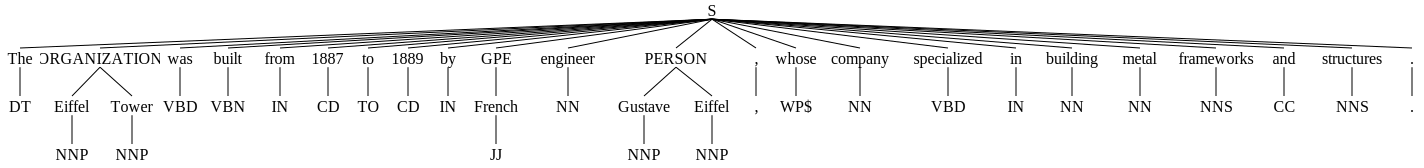

In [53]:
nltk.ne_chunk(tag_elements)

## Word2vec

In [1]:
import gensim

In [2]:
from gensim.models import Word2Vec, KeyedVectors

In [4]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
vec_king = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:
vec_king.shape

(300,)

In [9]:
wv['cricket'].shape

(300,)

In [10]:
wv.most_similar('cricket')

[('cricketing', 0.8372224569320679),
 ('cricketers', 0.8165745139122009),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [11]:
wv.most_similar('happy')

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [12]:
wv.similarity('king','queen')

0.6510956

In [13]:
vec = wv['king']-wv['man']+wv['woman']

In [14]:
wv.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300516366958618),
 ('monarch', 0.6454660296440125),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376776456832886),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]